# Trabalho 2 da disciplina Aprendizado de Máquina, constante da ementa do mestrado em ciência da computação no CEFET-RJ.
Professor: Eduardo Bezerra      
    
Aluna: Francimary Garcia
    
Entrega: 31/10/2017

# 1 Regressão Logística com Regularização

# Implementar a regressão logística regularizada para prever se os microchips de uma usina de fabricação passam na garantia de qualidade (QA). 
Durante a QA, cada microchip passa por vários testes para garantir se está funcionando corretamente. Suponha que você seja o gerente de produto da fábrica e você tem os resultados de teste para alguns microchips em dois testes diferentes. A partir desses dois testes, você gostaria de determinar se os microchips deveriam ser aceitos ou rejeitados. Para ajudá-lo a tomar a decisão, você tem um conjunto de dados de resultados de testes anteriores sobre microchips, a partir do qual você pode construir um modelo de regressão logística. 

In [380]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import csv
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab as pl
import os 
import scipy.optimize as opt  
%matplotlib inline


from scipy.optimize import minimize

from sklearn.preprocessing import PolynomialFeatures

Leitura dos dados do arquivo fornecido contendo os resultados obtidos nos testes 1 e 2 e o status de aceitação(1) ou rejeição(0) do produto.

In [381]:
arquivo = 'C:\\\\Users\\\\Raymundo\\\\Documents\\\\Franci\\\\MestradoCEFET\\\\7 Aprendizado de Máquina\\\\Trabalho 2\\\\ex2data2.txt'

ficheiro = open(arquivo, "r")

dados = pd.read_csv(ficheiro, names = ['Teste1', 'Teste2','Status'])

dados.head()

,Teste1,Teste2,Status
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [382]:
y = np.c_[dados.values[:,2]]
X = dados.values[:,0:2]

In [383]:
positive = dados[dados['Status'].isin([1])]  
negative = dados[dados['Status'].isin([0])]

# 1.1 - Visualização dos Dados

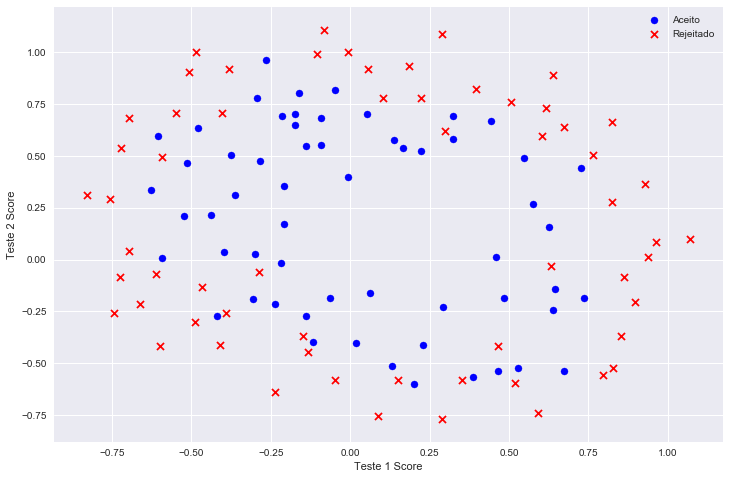

In [384]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(positive['Teste1'], positive['Teste2'], s=50, c='b', marker='o', label='Aceito')  
ax.scatter(negative['Teste1'], negative['Teste2'], s=50, c='r', marker='x', label='Rejeitado')  
ax.legend()  
ax.set_xlabel('Teste 1 Score')  
ax.set_ylabel('Teste 2 Score')  

Pela visualização do gráfico de dispersão acima, podemos notar que não existe uma distribuição linear entre os dados fornecidos e nem mesmo existe um limite de decisão linear que funcione bem nesses dados. Para cenários desta natureza uma maneira de lidarmos é construir atributos que são derivados de polinômios dos atributos originais. Alimentando o classificador com uma boa quantidade de atributos polinomiais.

# 1.2 - Mapeamento de características (feature mapping)

Nesta seção acrescentaremos novas características ao vetor dado, derivadas das características originais do mesmo.
Como mostrado abaixo, partiremos de um vetor com 3 características para um vetor com 28 dimensões,  pois o mesmo mapeará as características para todos os termos polinomiais de x1 e x2, até a sexta potência.

Um classiﬁcador que usa regressão logística treinado nesse vetor de características de maior dimensão terá uma fronteira de decisão mais complexa e parecerá não linear quando desenhado em um gráﬁco bidimensional.
Embora o mapeamento de características nos permita construir um classiﬁcador mais expressivo, também é mais suscetível a sobreajuste (overﬁtting). 

In [385]:
dados.shape

(118, 3)

In [386]:

# Note that this function inserts a column with 'ones' in the design matrix for the intercept.
poly = PolynomialFeatures(6)
XX = poly.fit_transform(dados.values[:,0:2])
XX.shape


(118, 28)

# 1.3 Função de custo e gradiente


Implementar o código para calcular a função de custo e o gradiente para a regressão logística "regularizada".

As novas funções de Custo e Gradiente implementadas possuem uma nova variável chamada "reg" que é uma função dos valores dos parâmetros. 
À medida que os parâmetros aumentam, a penalização adicionada à função de custo aumenta. 


In [387]:
def sigmoid(z):  
    return 1 / (1 + np.exp(-z))

In [388]:
def costFunctionReg(theta, reg, *args):
    m = y.size
    h = sigmoid(XX.dot(theta))
    
    J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y)) + (reg/(2*m))*np.sum(np.square(theta[1:]))
    
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

In [389]:
def gradientReg(theta, reg, *args):
    m = y.size
    h = sigmoid(XX.dot(theta.reshape(-1,1)))
      
    grad = (1/m)*XX.T.dot(h-y) + (reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
        
    return(grad.flatten())

In [390]:
initial_theta = np.zeros(XX.shape[1])

print("O erro para o modelo com theta igual a zero é: %.4f" %costFunctionReg(initial_theta, 1, XX, y))

O erro para o modelo com theta igual a zero é: 0.6931



Utilizando opt.fmin_tnc para minimizar uma função com variáveis ​​sujeitas a limites, usando informações de gradiente em um algoritmo Newton truncado e encontrando os parâmetros para o modelo ótimo.

In [391]:
result2 = opt.fmin_tnc(func=costFunctionReg, x0=initial_theta, fprime=gradientReg, args=(XX.all(),y, 1)) 
print("Os valores dos parâmetros para o modelo ótimo são:")
result2 

Os valores dos parâmetros para o modelo ótimo são:


(array([ 1.27271026,  0.62529964,  1.18111686, -2.01987399, -0.91743189,
        -1.43166929,  0.12393228, -0.36553118, -0.35725405, -0.17516291,
        -1.45817009, -0.05098418, -0.61558559, -0.27469165, -1.19271299,
        -0.24217841, -0.20603304, -0.04466177, -0.27778946, -0.29539514,
        -0.45645982, -1.04319154,  0.02779373, -0.29244863,  0.01555759,
        -0.32742403, -0.14389149, -0.92467488]), 32, 1)

# 1.4 Esboço da fronteira de decisão


Esboçar a fronteira de decisão que foi aprendida para separar os exemplos positivos dos negativos.

In [392]:
def predict(theta, X, threshold=0.5):
    p = sigmoid(X.dot(theta.T)) >= threshold
    return(p.astype('int'))

In [393]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data.values[:,2] == 0
    pos = data.values[:,2] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data.values[pos][:,0], data.values[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data.values[neg][:,0], data.values[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

C:\Users\Raymundo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


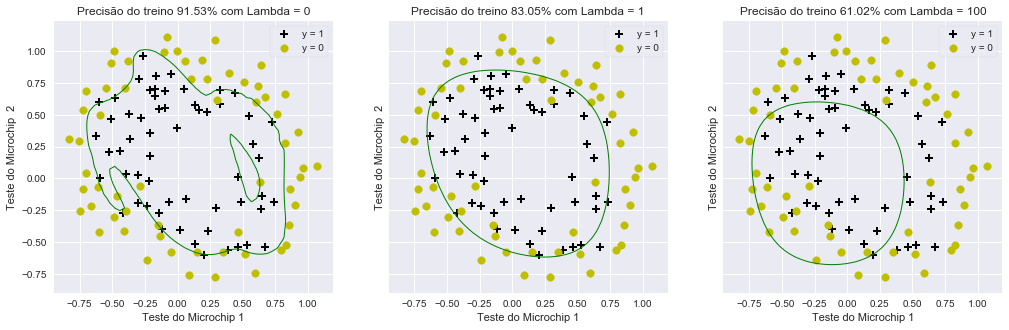

In [394]:
fig, axes = plt.subplots(1,3, sharey = True, figsize=(17,5))

# Decision boundaries
# Lambda = 0 : No regularization --> too flexible, overfitting the training data
# Lambda = 1 : Looks about right
# Lambda = 100 : Too much regularization --> high bias

for i, C in enumerate([0, 1, 100]):
    # Optimize costFunctionReg
    res2 = minimize(costFunctionReg, initial_theta, args=(C, XX, y), method=None, jac=gradientReg, 
                    options={'maxiter':3000})
    
    
    # Accuracy
    accuracy = 100*sum(predict(res2.x, XX) == y.ravel())/y.size  
    
 # Scatter plot of X,y
    plotData(dados, 'Teste do Microchip 1', 'Teste do Microchip  2', 'y = 1', 'y = 0', axes.flatten()[i])
    
    # Plot decisionboundary
    x1_min, x1_max = X[:,0].min(), X[:,0].max(),
    x2_min, x2_max = X[:,1].min(), X[:,1].max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(res2.x))
    h = h.reshape(xx1.shape)
    axes.flatten()[i].contour(xx1, xx2, h, [0.5], linewidths=1, colors='g');       
    axes.flatten()[i].set_title('Precisão do treino {}% com Lambda = {}'.format(np.round(accuracy, decimals=2), C))

Nos gráficos acima podemos observar o comportamento do modelo para os três valores de Lambda. 

Com o Lambda=0 observamos o comportamento de sobreajuste, com o Lambda=1 o comportamento mais ajustado e com Lambda = 100 o comportamento com alto viés. 

# 2 Regressão Linear com Regularização

Implementar a regressão linear com regularização para prever a quantidade de água ﬂuindo de uma barragem usando a mudança do nível da água em um reservatório.
Além de realizar diagnósticos dos algoritmos de aprendizado por meio de depuração e examinar os efeitos de viés (bias) e da variância (variance)

In [395]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import loadmat
from scipy.optimize import minimize

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

import seaborn as sns

O arquivo de dados fornecido possui registros históricos na mudança no nível da água, X, e da quantidade de água que sai da barragem, y. Este conjunto de dados é dividido em três partes:

    Treinamento: X e y
    Validação: Xval e yval e
    Teste: Xtest e ytest


In [396]:

data = loadmat('C:\\\\Users\\\\Raymundo\\\\Documents\\\\Franci\\\\MestradoCEFET\\\\7 Aprendizado de Máquina\\\\Trabalho 2\\\\ex5data1.mat')

data.keys()

y_train = data['y']
X_train = np.c_[np.ones_like(data['X']), data['X']]

yval = data['yval']
Xval = np.c_[np.ones_like(data['Xval']), data['Xval']]

ytest = data['ytest']
Xtest = np.c_[np.ones_like(data['Xtest']), data['Xtest']]


print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('Xval:', Xval.shape)
print('yval:', yval.shape)
print('Xtest:', Xtest.shape)
print('ytest:', ytest.shape)


X_train: (12, 2)
y_train: (12, 1)
Xval: (21, 2)
yval: (21, 1)
Xtest: (21, 2)
ytest: (21, 1)


# 2.1 Visualização dos Dados


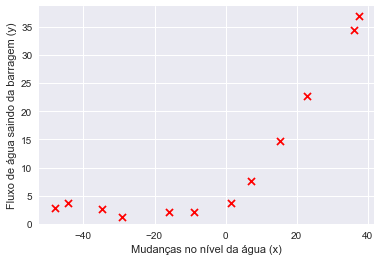

In [397]:
plt.scatter(X_train[:,1], y_train, s=50, c='r', marker='x', linewidths=1)
plt.xlabel('Mudanças no nível da água (x)')
plt.ylabel('Fluxo de água saindo da barragem (y)')
plt.ylim(ymin=0);


Acima visualização dos dados de treinamento, onde pode-se notar a tendência de aumento do fluxo de água saindo da barragem quando aumentam as mudanças no nível de água.

# 2.2 Função de custo da regressão linear regularizada


Escrever uma função para calcular a função de custo da regressão linear regularizada. 

In [398]:
def linearRegCostFunction(theta, X, y, reg):
    m = y.size
    
    h = X.dot(theta)
    
    J = (1/(2*m))*np.sum(np.square(h-y)) + (reg/(2*m))*np.sum(np.square(theta[1:]))
   
    return(J)

In [399]:
initial_theta = np.ones((X_train.shape[1],1))
cost = linearRegCostFunction(initial_theta, X_train, y_train, 0)

print(" O valor do custo do modelo para theta inicializado com (1,1) é %.4f" %cost)


 O valor do custo do modelo para theta inicializado com (1,1) é 303.9515


# 2.3 Gradiente na regressão linear regularizada


Adicionar código para calcular o gradiente.

In [400]:
def lrgradientReg(theta, X, y, reg):
    m = y.size
    
    h = X.dot(theta.reshape(-1,1))
        
    grad = (1/m)*(X.T.dot(h-y))+ (reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
        
    return(grad.flatten())

In [401]:
gradient = lrgradientReg(initial_theta, X_train, y_train, 0)
print("O valor do gradiente para theta inicializado com (1,1) é ")
print(gradient)
grad=gradient

O valor do gradiente para theta inicializado com (1,1) é 
[ -15.30301567  598.16741084]


# 2.4 Ajustando os parâmetros da regressão linear


Computar os valores ótimos para θ, mas sem usar regularização, i.e., deﬁna λ = 0. Após isso, construir um gráﬁco para visualiar o modelo construído.

In [402]:
def trainLinearReg(X, y, reg):
    #initial_theta = np.zeros((X.shape[1],1))
    initial_theta = np.array([[15],[15]])
    # For some reason the minimize() function does not converge when using
    # zeros as initial theta.
        
    res = minimize(linearRegCostFunction, initial_theta, args=(X,y,reg), method=None, jac=lrgradientReg,
                   options={'maxiter':5000})
    
    return(res)

In [403]:
fit = trainLinearReg(X_train, y_train, 0)
fit

      fun: 1604.4002999186634
 hess_inv: array([[ 1.03142187,  0.00617881],
       [ 0.00617881,  0.001215  ]])
      jac: array([  3.42437190e-12,  -5.70371898e-10])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([ 13.08790351,   0.36777923])

In [404]:
regr = LinearRegression(fit_intercept=False)
regr.fit(X_train, y_train.ravel())
print(regr.coef_)
print(linearRegCostFunction(regr.coef_, X_train, y_train, 0))

[ 13.08790351   0.36777923]
1604.40029992


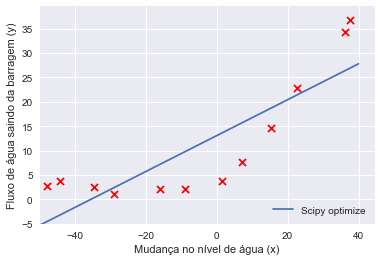

In [405]:
plt.plot(np.linspace(-50,40), (fit.x[0]+ (fit.x[1]*np.linspace(-50,40))), label='Scipy optimize')
#plt.plot(np.linspace(-50,40), (regr.coef_[0]+ (regr.coef_[1]*np.linspace(-50,40))), label='Scikit-learn')
plt.scatter(X_train[:,1], y_train, s=50, c='r', marker='x', linewidths=1)
plt.xlabel('Mudança no nível de água (x)')
plt.ylabel('Fluxo de água saindo da barragem (y)')
plt.ylim(ymin=-5)
plt.xlim(xmin=-50)
plt.legend(loc=4);

Acima gráfico representando o ajuste linear do modelo.

# 3 Viés-Variância

Um conceito importante no Aprendizado de Máquina é o relacionamento entre o viés (bias) e a variância (variance) de um modelo de aprendizado. Modelos com viés elevado não são suﬁcientemente complexos para os dados e tendem a sofrer de subajuste (underﬁtting), enquanto que modelos com alta variância tendem a sofrer de sobreajuste. 

Nesta parte do trabalho, produzir gráﬁcos dos erros de treinamento e teste na forma de curvas de aprendizado para diagnosticar problemas de viés e variância.


# 3.1 Curvas de Aprendizado


Implementar código para gerar as curvas de aprendizado que serão úteis na depuração de algoritmos de aprendizagem. 

Uma curva de aprendizagem traça erros de treinamento e de validação cruzada como funções do tamanho do conjunto de treinamento.

In [406]:
def learningCurve(X, y, Xval, yval, reg):
    m = y.size
    
    error_train = np.zeros((m, 1))
    error_val = np.zeros((m, 1))
    
    for i in np.arange(m):
        res = trainLinearReg(X[:i+1], y[:i+1], reg)
        error_train[i] = linearRegCostFunction(res.x, X[:i+1], y[:i+1], reg)
        error_val[i] = linearRegCostFunction(res.x, Xval, yval, reg)
    
    return(error_train, error_val)

In [407]:
t_error, v_error = learningCurve(X_train, y_train, Xval, yval, 0)

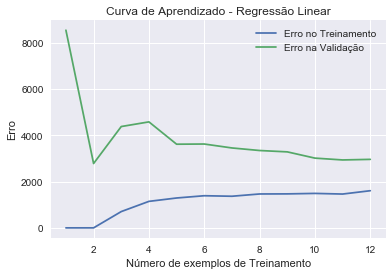

In [408]:
plt.plot(np.arange(1,13), t_error, label='Erro no Treinamento')
plt.plot(np.arange(1,13), v_error, label='Erro na Validação')
plt.title('Curva de Aprendizado - Regressão Linear')
plt.xlabel('Número de exemplos de Treinamento')
plt.ylabel('Erro')
plt.legend();

Observamos que os erros de treinamento e de validação cruzada são ambos altos quando o número de exemplos de treinamento é aumentado. Isso reﬂete o viés alto do modelo (o modelo de regressão linear é muito simples e não consegue se ajustar bem ao conjunto de dados). 

Na próxima seção, implementar regressão polinomial para ajustar um modelo melhor a este conjunto de dados.


# 4 Regressão Polinomial


O problema com nosso modelo linear é que ele é muito simples para os dados e resultou em subajuste (viés alto). Nesta parte, resolver esse problema adicionando mais características ao modelo através da Regressão Polinomial. 

In [409]:
print(X_train.shape)
poly = PolynomialFeatures(degree=8)
X_train_poly = poly.fit_transform(X_train[:,1].reshape(-1,1))
X_train_poly.shape


(12, 2)


(12, 9)

A partir dos dados originais de treinamento X_train, incluímos mais carateríticas à matriz, utilizando a função PolinomialFeatures com grau 8, obtendo uma matriz 12X9.

# 5 Regressão Polinomial - Aprendizado


Treinar um modelo de regressão polinomial usando sua função de custo da regressão linear.

Apesar de existirem termos polinomiais no vector de características, ainda estamos resolvendo um problema de otimização de regressão linear. Os termos polinomiais simplesmente se transformaram em características que podemos usar para aplicar regressão linear. Usar a mesma função de custo e gradiente que implementada para a parte anterior deste trabalho.

In [410]:
def featureNormalize(X):
    #FEATURENORMALIZE Normalizes the features in X 
    #   FEATURENORMALIZE(X) returns a normalized version of X where
    #   the mean value of each feature is 0 and the standard deviation
    #   is 1. This is often a good preprocessing step to do when
    #   working with learning algorithms.

    mu = np.mean(X, axis=0)
    X_norm = X - mu

    sigma = np.std(X_norm, axis=0)
    X_norm = X_norm/sigma

    return X_norm, mu, sigma


In [411]:
def polyFeatures(X, p):
    
    # initialize X_poly to be equal to the single-column X
    X_poly = X

    # if p is equal or greater than 2
    if p >= 2:

        # for each number between column 2 (index 1) and last column
        for k in range(1,p):

            # add k-th column of polynomial features where k-th column is X.^k
            X_poly = np.column_stack((X_poly, np.power(X,k+1)))
            

    return X_poly

In [412]:
p = 8;

m = X.shape[0]
# Map X onto Polynomial Features and Normalize
X_poly = polyFeatures(X, p)
X_poly, mu, sigma = featureNormalize(X_poly)  # Normalize
X_poly = np.column_stack((np.ones((m,1)), X_poly)) # Add Ones

# # Map X_poly_test and normalize (using mu and sigma)
X_poly_test = polyFeatures(Xtest, p)
X_poly_test = X_poly_test - mu
X_poly_test = X_poly_test / sigma
X_poly_test = np.column_stack((np.ones((X_poly_test.shape[0],1)), X_poly_test)) # Add Ones

# # Map X_poly_val and normalize (using mu and sigma)
X_poly_val = polyFeatures(Xval, p)
X_poly_val = X_poly_val - mu
X_poly_val = X_poly_val / sigma
X_poly_val = np.column_stack((np.ones((X_poly_val.shape[0],1)), X_poly_val)) # Add Ones

print('Exemplo de treinamento normalizado 1:')
print(X_poly[1, :])

Exemplo de treinamento normalizado 1:
[ 1.         -0.29829632  0.9696688  -0.96564216  0.59215143 -0.22170204
  0.55114726 -0.58769127  0.17475633 -0.24297567  0.1176616  -0.40598316
 -0.07612106 -0.23180217 -0.10300593 -0.30185286 -0.18254108]


# Parte 2 do Trabalho 2

Implementar o algoritmo de detecção de anomalia e aplicá-lo para detectar servidores com falha em uma rede. 
Na segunda parte, usar a filtragem colaborativa para criar um sistema de recomendação para filmes.

# 2- Detecção de Anomalias

Implementar um algoritmo de detecção de anomalia para detectar comportamentos anômalos nos servidores de um centro de dados. 
As características medem a vazão (throughput) (mb/s) e a latência (ms) de resposta de cada servidor. Enquanto seus servidores estavam funcionando, 
foram coletados m = 307 exemplos de como eles estavam se comportando. Há a suspeita de que a grande maioria desses exemplos são exemplos ”normais”(não
anômalos) dos servidores que operam normalmente, mas também pode haver alguns exemplos de servidores que atuam de forma anômala nesse conjunto de
dados.
Usar um modelo gaussiano para detectar exemplos anômalos em seu conjunto de dados. Usar um conjunto de dados 2D que permitirá a visualização
do que o algoritmo está fazendo. Nesse conjunto de dados, ajustar uma distribuição gaussiana e então encontrar valores que têm probabilidade
muito baixa e, portanto, podem ser considerados anomalias.

# 2.1 Distribuição Gaussiana

Dado um conjunto de treinamento {x(1), . . . , x(m)} (onde x(i) ∈ Rn), estimar a distribuição gaussiana para cada uma das características xj .
Para cada característica j = 1, . . . , n, encontrar os parâmetros µj e σ2j que se encaixam nos dados na j-ésima dimensão x(1), ..., x(m) (a j-ésima dimensão de cada exemplo).
A distribuição gaussiana é dada por
p(x; µ, σ2) = 1√2πσexp −(x − µ)22σ2

In [413]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sb  
from scipy.io import loadmat  
%matplotlib inline


In [414]:
data = loadmat('C:\\\\Users\\\\Raymundo\\\\Documents\\\\Franci\\\\MestradoCEFET\\\\7 Aprendizado de Máquina\\\\Trabalho 2\\\\ex8data1.mat')  
X = data['X']  
X.shape 

(307, 2)

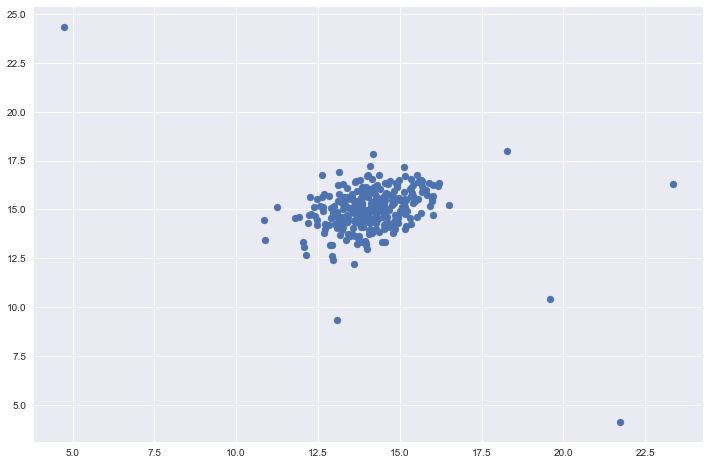

In [415]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(X[:,0], X[:,1]) 

Pelo gráfico acima podemos identificar a existência de um agrupamento de dados em uma região central, com alguns valores mais longe do agrupamento. Neste exemplo, os pontos mais afastados podem ser considerados anomalias. Para concluirmos essa dedução, devemos estimar uma distribuição gaussiana para cada característica nos dados.

# 2.2 Estimativa de parâmetros para uma gaussiana

Estimar os parâmetros, (µj , σ2j), da j-ésima característica usando as equações apresentadas em aula.
A tarefa é implementar uma função estimativaGaussiana que toma como entrada a matriz de dados X e deve produzir um vetor de dimensão n mu
que contém a média de todas as características n e outro vetor de dimensão n sigma2 que contém as variâncias de todas as características.


In [416]:
def estimativaGaussiana(X):  
    mu = X.mean(axis=0)
    sigma = X.var(axis=0)

    return mu, sigma

mu, sigma = estimativaGaussiana(X)  
mu, sigma  
print("As médias do vetor dado são: " )
print(mu)
print(" As variâncias do vetor dado são: " )
print(sigma)

As médias do vetor dado são: 
[ 14.11222578  14.99771051]
 As variâncias do vetor dado são: 
[ 1.83263141  1.70974533]


# 2.3 Selecionando E

Agora que os parâmetros gaussianos foram avaliados, você pode investigar quais exemplos têm uma probabilidade muito alta dada essa distribuição e quais
exemplos têm uma probabilidade muito baixa. Os exemplos de baixa probabilidade
são mais prováveis de ser as anomalias em nosso conjunto de dados. Uma maneira de determinar quais exemplos são anomalias é selecionar um limite E com base em um conjunto de validação cruzada. Nesta parte do exercício,
deve ser implementado um algoritmo para selecionar o limite E usando a medida F1 em um conjunto de validação cruzada. Implementar código usando um conjunto de validação cruzada 
{(x(1)cv , y(1)cv ), . . . , x(m)cv , y(m)cv )}, onde o rótulo y = 1 corresponde a um exemplo anômalo. Para cada exemplo no conjunto de validação, deve-se computar Pr(x(i)cv ). O vetor de todas essas probabilidades 
Pr(x(1)cv ), . . . , Pr(x(mcv)cv ), assim como os rótulos correspondentes, devem ser passados como retorno do código implementado.

In [417]:
Xval = data['Xval']  
yval = data['yval']

Xval.shape, yval.shape  

((307, 2), (307, 1))

Abaixo está o cálculo da probabilidade de um ponto de dados pertencer a uma distribuição normal. A função stats.norm do SciPy realiza esta atividade.

In [418]:
from scipy import stats
dist = stats.norm(mu[0], sigma[0])
print("Probabilidade de um ponto de dados pertencer a Normal:%.4f" %dist.pdf(15))


Probabilidade de um ponto de dados pertencer a Normal:0.1936


Também podemos passar em uma matriz para a função de densidade de probabilidade e obter a densidade de probabilidade em todos os pontos do conjunto de dados.

In [419]:

dist.pdf(X[:,0])[0:50]  

array([ 0.183842  ,  0.20221694,  0.21746136,  0.19778763,  0.20858956,
        0.21652359,  0.16991291,  0.15123542,  0.1163989 ,  0.1594734 ,
        0.21716057,  0.21760472,  0.20141857,  0.20157497,  0.21711385,
        0.21758775,  0.21695576,  0.2138258 ,  0.21057069,  0.1173018 ,
        0.20765108,  0.21717452,  0.19510663,  0.21702152,  0.17429399,
        0.15413455,  0.21000109,  0.20223586,  0.21031898,  0.21313426,
        0.16158946,  0.2170794 ,  0.17825767,  0.17414633,  0.1264951 ,
        0.19723662,  0.14538809,  0.21766361,  0.21191386,  0.21729442,
        0.21238912,  0.18799417,  0.21259798,  0.21752767,  0.20616968,
        0.21520366,  0.1280081 ,  0.21768113,  0.21539967,  0.16913173])

Vamos calcular e salvar a densidade de probabilidade de cada um dos valores em nosso conjunto de dados, dados os parâmetros do modelo gaussiano que calculamos acima.

In [420]:

p = np.zeros((X.shape[0], X.shape[1]))  
p[:,0] = stats.norm(mu[0], sigma[0]).pdf(X[:,0])  
p[:,1] = stats.norm(mu[1], sigma[1]).pdf(X[:,1])

p.shape 

(307, 2)

Também precisamos fazer isso para o conjunto de validação (usando os mesmos parâmetros do modelo). Usaremos essas probabilidades combinadas com o rótulo verdadeiro para determinar o limite de probabilidade ótimo para atribuir pontos de dados como anomalias.

In [421]:
pval = np.zeros((Xval.shape[0], Xval.shape[1]))  
pval[:,0] = stats.norm(mu[0], sigma[0]).pdf(Xval[:,0])  
pval[:,1] = stats.norm(mu[1], sigma[1]).pdf(Xval[:,1])  
pval.shape

(307, 2)

A função selectThreshold deve retornar dois valores; o primeiro é o limite selecionado E. Se um exemplo x tiver uma baixa probabilidade Pr(x) < E, então
é considerado uma anomalia. A função também deve retornar a pontuação F1,
o que indica o quão bem você está realizando a tarefa de encontrar as anomalias verdadeiras, dado um determinado limite. Para muitos valores diferentes de E,
calcular o resultado F1 resultante ao calcular quantos exemplos o limite atual classifica corretamente e incorretamente.


Precisamos de uma função que encontre o melhor valor limiar, dados os valores de densidade de probabilidade e os rótulos verdadeiros. Para fazer isso, calcularemos a pontuação F1 para valores variáveis de epsilon. F1 é uma função do número de verdadeiros positivos, falsos positivos e falsos negativos. 

In [422]:
def select_threshold(pval, yval):  
    best_epsilon = 0
    best_f1 = 0
    f1 = 0

    step = (pval.max() - pval.min()) / 1000

    for epsilon in np.arange(pval.min(), pval.max(), step):
        preds = pval < epsilon

        tp = np.sum(np.logical_and(preds == 1, yval == 1)).astype(float)
        fp = np.sum(np.logical_and(preds == 1, yval == 0)).astype(float)
        fn = np.sum(np.logical_and(preds == 0, yval == 1)).astype(float)

        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        f1 = (2 * precision * recall) / (precision + recall)

        if f1 > best_f1:
            best_f1 = f1
            best_epsilon = epsilon

    return best_epsilon, best_f1
# Validation data
epsilon, f1 = select_threshold(pval, yval)  
print("O melhor valor de Epsilon é: %.4f" %epsilon)
print("O melhor valor valor de F1 é: %.4f" %f1)  

C:\Users\Raymundo\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


O melhor valor de Epsilon é: 0.0096
O melhor valor valor de F1 é: 0.7143


Podemos aplicar o limiar ao conjunto de dados e visualizar os resultados.

In [423]:
# indexes of the values considered to be outliers
# Train data
outliers = np.where(p < epsilon)
outliers

(array([300, 301, 301, 303, 303, 304, 306, 306], dtype=int64),
 array([1, 0, 1, 0, 1, 0, 0, 1], dtype=int64))

Podemos visualizar quais pontos foram identificados como outliers.

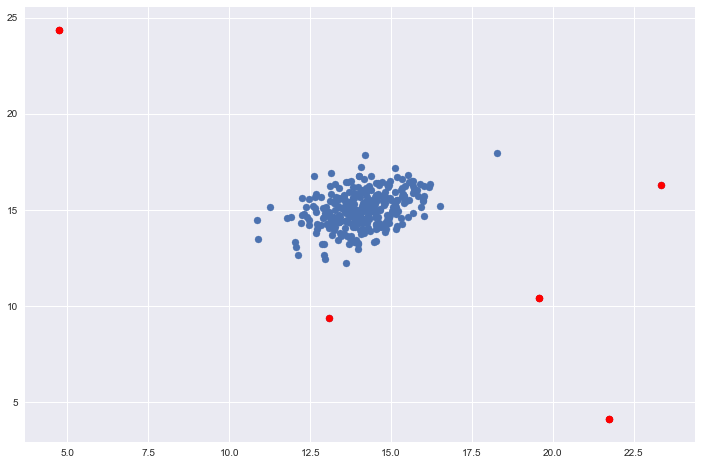

In [424]:

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(X[:,0], X[:,1])  
ax.scatter(X[outliers[0],0], X[outliers[0],1], s=50, color='r', marker='o')  

No gráfico acima, podemos visualizar em vermelho os pontos identificados como outliers.

# 3 Sistemas de Recomendação

Implementar o algoritmo de aprendizagem de filtragem colaborativa e aplicá-lo a um conjunto de dados de avaliações de filmes. 
Este conjunto de dados consiste em classificações em uma escala de 1 a 5. O conjunto de dados tem nu = 943 usuários e nm = 1682 filmes. O arquivo que contém o
conjunto de dados tem nome ex8_movies.mat e contém as variáveis Y e R.

Os motores de recomendação usam medidas de similaridade com itens e usuários para examinar as preferências históricas de um usuário para fazer recomendações para novas "coisas" em que o usuário possa estar interessado. Neste exercício, implementaremos um algoritmo de sistema de recomendação particular chamado filtragem colaborativa e aplicá-lo para um conjunto de dados de classificações de filmes.

In [425]:
data = loadmat('C:\\\\Users\\\\Raymundo\\\\Documents\\\\Franci\\\\MestradoCEFET\\\\7 Aprendizado de Máquina\\\\Trabalho 2\\\\ex8_movies.mat')  
data  

{'R': array([[1, 1, 0, ..., 1, 0, 0],
        [1, 0, 0, ..., 0, 0, 1],
        [1, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'Y': array([[5, 4, 0, ..., 5, 0, 0],
        [3, 0, 0, ..., 0, 0, 5],
        [4, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Dec  1 17:19:26 2011',
 '__version__': '1.0'}

# 3.1 Conjunto de dados de classificações de filme

Y é uma matriz de (número de filmes X número de usuários) contendo classificações de 1 a 5. R é uma matriz "indicador" contendo valores binários indicando se um usuário classificou um filme ou não. Ambos devem ter a mesma forma.

O objetivo da filtragem colaborativa é prever as classificações de filmes para os filmes que os usuários ainda não classificaram, ou seja, as entradas com R(i, j) = 0. Isso permitirá recomendar os filmes com classificações mais altas previstas para outros usuários.

In [426]:
Y = data['Y']  
R = data['R']  
Y.shape, R.shape  

((1682, 943), (1682, 943))

Podemos observar a classificação média dos filmes com uma média de uma linha em Y para índices onde uma classificação está presente.

In [427]:
print(" Classificação média dos filmes:%.4f" %Y[1,R[1,:]].mean()  )

 Classificação média dos filmes:2.5832


Também podemos tentar "visualizar" os dados, representando a matriz como se fosse uma imagem. Não podemos tirar muito disso, mas nos dá uma idéia de uma densidade relativa de classificações entre usuários e filmes.

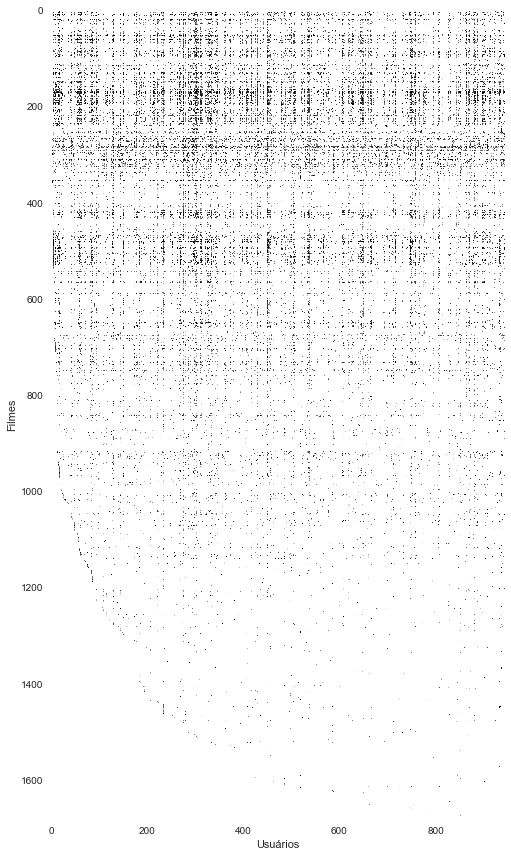

In [428]:
fig, ax = plt.subplots(figsize=(12,12))  
ax.imshow(Y)  
ax.set_xlabel('Usuários')  
ax.set_ylabel('Filmes')  
fig.tight_layout() 

# 3.2 Algoritmo de aprendizagem de filtragem colaborativa

Implementar o algoritmo de filtragem colaborativa. Deve iniciar implementando a funçãoo de custo (sem regularização). O algoritmo de filtragem colaborativa no contexto das recomendações de filmes considera um conjunto de vetores de parâmetros n-dimensionais x(i), . . . , x(nm)e θ(1), . . . , θ(nu), onde o modelo prediz a avaliação para o filme i pelo usuário j como y(i,j) = (θ(j))T x(i). 
Dado um conjunto de dados que consiste em um conjunto de avaliações produzidas por alguns usuários para alguns filmes, o algoritmo deve aprender os vetores de parâmetros x(i), . . . , x(nm)e θ(1), . . . , θ(nu)que produzem o melhor ajuste (i.e., minimizam o erro quadrático).

Abaixo implementação da função de custo para filtragem colaborativa. Intuitivamente, o "custo" é o grau em que um conjunto de previsões de classificação de filmes se desviam das previsões verdadeiras. A equação de custo é dada no texto do exercício. Baseia-se em dois conjuntos de matrizes de parâmetros denominados X e Theta no texto. Estes são "desenrolados" na entrada "params" para que possamos usar o pacote de otimização da SciPy mais tarde. 

In [429]:
def cost(params, Y, R, num_features):  
    Y = np.matrix(Y)  # (1682, 943)
    R = np.matrix(R)  # (1682, 943)
    num_movies = Y.shape[0]
    num_users = Y.shape[1]

    # reshape the parameter array into parameter matrices
    X = np.matrix(np.reshape(params[:num_movies * num_features], (num_movies, num_features)))  # (1682, 10)
    Theta = np.matrix(np.reshape(params[num_movies * num_features:], (num_users, num_features)))  # (943, 10)

    # initializations
    J = 0

    # compute the cost
    error = np.multiply((X * Theta.T) - Y, R)  # (1682, 943)
    squared_error = np.power(error, 2)  # (1682, 943)
    J = (1. / 2) * np.sum(squared_error)

    return J

# 3.2.1 Função de custo da filtragem colaborativa


Para fazer teste, utilizaremos um conjunto de parâmetros pré-treinados que podemos avaliar. Para reduzir o tempo de avaliação, analisaremos apenas um pequeno subconjunto dos dados constante no arquivo ex8_movieParams.mat.

In [430]:
users = 4  
movies = 5  
features = 3

params_data = loadmat('C:\\\\Users\\\\Raymundo\\\\Documents\\\\Franci\\\\MestradoCEFET\\\\7 Aprendizado de Máquina\\\\Trabalho 2\\\\ex8_movieParams.mat')  

X = params_data['X']
Theta = params_data['Theta']
X.shape, Theta.shape


((1682, 10), (943, 10))

In [431]:
X_sub = X[:movies, :features]  
Theta_sub = Theta[:users, :features]  
Y_sub = Y[:movies, :users]  
R_sub = R[:movies, :users]

params = np.concatenate((np.ravel(X_sub), np.ravel(Theta_sub)))

print("Custo da Filtragem Colaborativa: %.4f" %cost(params, Y_sub, R_sub, features)  )

Custo da Filtragem Colaborativa: 22.2246


# 3.2.2 Gradiente de filtragem colaborativa

A função de custo será expandida para calcular também os gradientes.

Implementar o gradiente (sem regularização). Especificamente, deverá implementar código para retornar as variáveis X grad e Theta grad. 
Observe que X grad deve ser uma matriz do mesmo tamanho que X e, de forma semelhante, Theta grad é uma matriz
do mesmo tamanho que Theta.

In [432]:
def cost(params, Y, R, num_features):
    Y = np.matrix(Y)  # (1682, 943)
    R = np.matrix(R)  # (1682, 943)
    num_movies = Y.shape[0]
    num_users = Y.shape[1]
    
    # reshape the parameter array into parameter matrices
    X = np.matrix(np.reshape(params[:num_movies * num_features], (num_movies, num_features)))  # (1682, 10)
    Theta = np.matrix(np.reshape(params[num_movies * num_features:], (num_users, num_features)))  # (943, 10)
    
    # initializations
    J = 0
    X_grad = np.zeros(X.shape)  # (1682, 10)
    Theta_grad = np.zeros(Theta.shape)  # (943, 10)
    
    # compute the cost
    error = np.multiply((X * Theta.T) - Y, R)  # (1682, 943)
    squared_error = np.power(error, 2)  # (1682, 943)
    J = (1. / 2) * np.sum(squared_error)
    
    # calculate the gradients
    X_grad = error * Theta
    Theta_grad = error.T * X
    
    # unravel the gradient matrices into a single array
    grad = np.concatenate((np.ravel(X_grad), np.ravel(Theta_grad)))
    
    return J, grad

In [433]:
J, grad = cost(params, Y_sub, R_sub, features)
print("Valor do custo: %.4f" %J)
print("Valor do Gradiente:")
print(grad)

Valor do custo: 22.2246
Valor do Gradiente:
[ -2.52899165   7.57570308  -1.89979026  -0.56819597   3.35265031
  -0.52339845  -0.83240713   4.91163297  -0.76677878  -0.38358278
   2.26333698  -0.35334048  -0.80378006   4.74271842  -0.74040871
 -10.5680202    4.62776019  -7.16004443  -3.05099006   1.16441367
  -3.47410789   0.           0.           0.           0.           0.           0.        ]


# Extra: Incluindo Regularização ao Custo e ao Gradiente

Agora a implementação da função de Custo adicionará regularização tanto ao custo como ao cálculo de gradientes. 

In [434]:
def cost(params, Y, R, num_features, learning_rate):
    Y = np.matrix(Y)  # (1682, 943)
    R = np.matrix(R)  # (1682, 943)
    num_movies = Y.shape[0]
    num_users = Y.shape[1]
    
    # reshape the parameter array into parameter matrices
    X = np.matrix(np.reshape(params[:num_movies * num_features], (num_movies, num_features)))  # (1682, 10)
    Theta = np.matrix(np.reshape(params[num_movies * num_features:], (num_users, num_features)))  # (943, 10)
    
    # initializations
    J = 0
    X_grad = np.zeros(X.shape)  # (1682, 10)
    Theta_grad = np.zeros(Theta.shape)  # (943, 10)
    
    # compute the cost
    error = np.multiply((X * Theta.T) - Y, R)  # (1682, 943)
    squared_error = np.power(error, 2)  # (1682, 943)
    J = (1. / 2) * np.sum(squared_error)
    
    # add the cost regularization
    J = J + ((learning_rate / 2) * np.sum(np.power(Theta, 2)))
    J = J + ((learning_rate / 2) * np.sum(np.power(X, 2)))
    
    # calculate the gradients with regularization
    X_grad = (error * Theta) + (learning_rate * X)
    Theta_grad = (error.T * X) + (learning_rate * Theta)
    
    # unravel the gradient matrices into a single array
    grad = np.concatenate((np.ravel(X_grad), np.ravel(Theta_grad)))
    
    return J, grad

In [435]:
J, grad = cost(params, Y_sub, R_sub, features, 1.5)
J, grad

(31.344056244274221,
 array([ -0.95596339,   6.97535514,  -0.10861109,   0.60308088,
          2.77421145,   0.25839822,   0.12985616,   4.0898522 ,
         -0.89247334,   0.29684395,   1.06300933,   0.66738144,
          0.60252677,   4.90185327,  -0.19747928, -10.13985478,
          2.10136256,  -6.76563628,  -2.29347024,   0.48244098,
         -2.99791422,  -0.64787484,  -0.71820673,   1.27006666,
          1.09289758,  -0.40784086,   0.49026541]))

Antes de treinar o modelo, realizaremos um último teste. Utilizando classificações de filmes criadas, para que possamos usar o modelo para gerar recomendações personalizadas. Um arquivo é fornecido com dados que relacionam o índice do filme ao seu título.

In [436]:
movie_idx = {}
f = open('C:\\\\Users\\\\Raymundo\\\\Documents\\\\Franci\\\\MestradoCEFET\\\\7 Aprendizado de Máquina\\\\Trabalho 2\\\\movie_ids.txt')
for line in f:
    tokens = line.split(' ')
    tokens[-1] = tokens[-1][:-1]
    movie_idx[int(tokens[0]) - 1] = ' '.join(tokens[1:])

In [437]:
print(movie_idx[0])
print(movie_idx[1])
print(movie_idx[2])
print(movie_idx[3])
print(movie_idx[4])

Toy Story (1995)
GoldenEye (1995)
Four Rooms (1995)
Get Shorty (1995)
Copycat (1995)


Serão usadas as avaliações fornecidas.

In [438]:
ratings = np.zeros((1682, 1))

ratings[0] = 4
ratings[6] = 3
ratings[11] = 5
ratings[53] = 4
ratings[63] = 5
ratings[65] = 3
ratings[68] = 5
ratings[97] = 2
ratings[182] = 4
ratings[225] = 5
ratings[354] = 5

print('Avaliado {0}       com {1} estrelas.'.format(movie_idx[0], str(int(ratings[0]))))
print('Avaliado {0}       com {1} estrelas.'.format(movie_idx[6], str(int(ratings[6]))))
print('Avaliado {0}       com {1} estrelas.'.format(movie_idx[11], str(int(ratings[11]))))
print('Avaliado {0}       com {1} estrelas.'.format(movie_idx[53], str(int(ratings[53]))))
print('Avaliado {0}       com {1} estrelas.'.format(movie_idx[63], str(int(ratings[63]))))
print('Avaliado {0}       com {1} estrelas.'.format(movie_idx[65], str(int(ratings[65]))))
print('Avaliado {0}       com {1} estrelas.'.format(movie_idx[68], str(int(ratings[68]))))
print('Avaliado {0}       com {1} estrelas.'.format(movie_idx[97], str(int(ratings[97]))))
print('Avaliado {0}       com {1} estrelas.'.format(movie_idx[182], str(int(ratings[182]))))
print('Avaliado {0}       com {1} estrelas.'.format(movie_idx[225], str(int(ratings[225]))))
print('Avaliado {0}       com {1} estrelas.'.format(movie_idx[354], str(int(ratings[354]))))

Avaliado Toy Story (1995)       com 4 estrelas.
Avaliado Twelve Monkeys (1995)       com 3 estrelas.
Avaliado Usual Suspects, The (1995)       com 5 estrelas.
Avaliado Outbreak (1995)       com 4 estrelas.
Avaliado Shawshank Redemption, The (1994)       com 5 estrelas.
Avaliado While You Were Sleeping (1995)       com 3 estrelas.
Avaliado Forrest Gump (1994)       com 5 estrelas.
Avaliado Silence of the Lambs, The (1991)       com 2 estrelas.
Avaliado Alien (1979)       com 4 estrelas.
Avaliado Die Hard 2 (1990)       com 5 estrelas.
Avaliado Sphere (1998)       com 5 estrelas.



Podemos adicionar nosso próprio vetor de classificações ao conjunto de dados existente para incluir no modelo.

In [439]:
R = data['R']
Y = data['Y']

Y = np.append(Y, ratings, axis=1)
R = np.append(R, ratings != 0, axis=1)

Y.shape, R.shape, ratings.shape

((1682, 944), (1682, 944), (1682, 1))

Antes de treinar o modelo de filtragem colaborativa, precisamos definir algumas variáveis ​​e normalizar as classificações.

In [440]:
movies = Y.shape[0]  # 1682
users = Y.shape[1]  # 944
features = 10
learning_rate = 10.

X = np.random.random(size=(movies, features))
Theta = np.random.random(size=(users, features))
params = np.concatenate((np.ravel(X), np.ravel(Theta)))

X.shape, Theta.shape, params.shape

((1682, 10), (944, 10), (26260,))

In [441]:
Ymean = np.zeros((movies, 1))
Ynorm = np.zeros((movies, users))

for i in range(movies):
    idx = np.where(R[i,:] == 1)[0]
    Ymean[i] = Y[i,idx].mean()
    Ynorm[i,idx] = Y[i,idx] - Ymean[i]

Ynorm.mean()

5.5070364565159845e-19

In [442]:
from scipy.optimize import minimize

fmin = minimize(fun=cost, x0=params, args=(Ynorm, R, features, learning_rate), 
                method='CG', jac=True, options={'maxiter': 100})
fmin

     fun: 38985.81690371395
     jac: array([ 0.18089143,  0.1473266 ,  0.2928937 , ..., -0.00277383,
        0.00306087, -0.00158266])
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 148
     nit: 100
    njev: 148
  status: 1
 success: False
       x: array([ 0.01977919,  0.76759398,  0.7919232 , ...,  0.18618543,
        0.04580681,  0.06950694])

In [443]:
X = np.matrix(np.reshape(fmin.x[:movies * features], (movies, features)))
Theta = np.matrix(np.reshape(fmin.x[movies * features:], (users, features)))

X.shape, Theta.shape

((1682, 10), (944, 10))

In [444]:
predictions = X * Theta.T 
my_preds = predictions[:, -1] + Ymean
my_preds.shape

(1682, 1)

In [445]:
sorted_preds = np.sort(my_preds, axis=0)[::-1]
sorted_preds[:10]

matrix([[ 5.00000292],
        [ 5.00000044],
        [ 4.99999841],
        [ 4.99999788],
        [ 4.99999668],
        [ 4.99999601],
        [ 4.99999557],
        [ 4.99999509],
        [ 4.99999317],
        [ 4.99999023]])

Isso nos dá uma lista ordenada das melhores classificações, mas perdemos o índice para o qual essas classificações são feitas. Na verdade, precisamos usar o argsort para que possamos saber em que filme corresponde a classificação prevista.

In [446]:
idx = np.argsort(my_preds, axis=0)[::-1]
idx

matrix([[1292],
        [1188],
        [ 813],
        ..., 
        [1670],
        [1677],
        [ 313]], dtype=int64)

In [447]:
print("Predições dos filmes top 10:")
for i in range(10):
    j = int(idx[i])
    print('Avaliação predita de {0} para o filme {1}.'.format(str(float(my_preds[j])), movie_idx[j]))

Predições dos filmes top 10:
Avaliação predita de 5.0000029200402505 para o filme Star Kid (1997).
Avaliação predita de 5.000000435807627 para o filme Prefontaine (1997).
Avaliação predita de 4.999998412673749 para o filme Great Day in Harlem, A (1994).
Avaliação predita de 4.999997878724331 para o filme Marlene Dietrich: Shadow and Light (1996) .
Avaliação predita de 4.999996684970989 para o filme Santa with Muscles (1996).
Avaliação predita de 4.999996013460421 para o filme Entertaining Angels: The Dorothy Day Story (1996).
Avaliação predita de 4.99999556627312 para o filme Saint of Fort Washington, The (1993).
Avaliação predita de 4.999995087728949 para o filme They Made Me a Criminal (1939).
Avaliação predita de 4.999993174270982 para o filme Someone Else's America (1995).
Avaliação predita de 4.999990230197205 para o filme Aiqing wansui (1994).


# Os arquivos e todo o conteúdo deste trabalho estão armazenados em: https://github.com/Francimary/Aprendizado-de-M-quina